# Description of methodology
# Classification algorithms
# Support Verctor Machines (SVM)
From [Python Machine Learning - Second Edition By Sebastian Raschka, Vahid Mirjalili](https://www.packtpub.com/big-data-and-business-intelligence/python-machine-learning-second-edition)

## Maximum margin classification with support vector machines
Another powerful and widely used learning algorithm is the Support Vector Machine (SVM), which can be considered an extension of the perceptron. Using the perceptron algorithm, we minimized misclassification errors. However, in SVMs our optimization objective is to maximize the margin. The margin is defined as the distance between the separating hyperplane (decision boundary) and the training samples that are closest to this hyperplane, which are the so-called support vectors. This is illustrated in the following figure:

![svm](img/svm.jpg)

### Maximum margin intuition
The rationale behind having decision boundaries with large margins is that they tend to have a lower generalization error whereas models with small margins are more prone to overfitting. To get an idea of the margin maximization, let's take a closer look at those positive and negative hyperplanes that are parallel to the decision boundary, which can be expressed as follows:

$ w_0 + \boldsymbol{w}^T \boldsymbol{x}_{pos} = 1 \quad \quad \quad (1)$

$ w_0 + \boldsymbol{w}^T \boldsymbol{x}_{neg} = -1 \quad \quad (2)$

If we subtract those two linear equations (1) and (2) from each other, we get:

$ \implies \boldsymbol{w}^T (\boldsymbol{x}_{pos} - \boldsymbol{x}_{neg}) = 2 $

We can normalize this equation by the length of the vector w, which is defined as follows:

$ \newcommand\norm[1]{\left\lVert#1\right\rVert} \norm{ \boldsymbol{w} } = \sqrt{ \sum \limits_{j=1}^m w_j^2 } $

So we arrive at the following equation:

$ \newcommand\norm[1]{\left\lVert#1\right\rVert} \large{ \frac{ \boldsymbol{w}^T ( \boldsymbol{x}_{pos} - \boldsymbol{x}_{neg} } { \norm{ \boldsymbol{w} } } = \frac{2} { \norm{ \boldsymbol{w} } } } $

The left side of the preceding equation can then be interpreted as the **distance between the positive and negative hyperplane**, which is the so-called **margin** that we want to maximize.

Now, the objective function of the SVM becomes the maximization of this margin by maximizing $\frac{2} {||\boldsymbol{w}||}$ under the constraint that the samples are classified correctly, which can be written as:

$ w_0 + \boldsymbol{w}^T \boldsymbol{x}^{(i)} \geq 1 \text{ if } y^{(i)} = 1 $

$ w_0 + \boldsymbol{w}^T \boldsymbol{x}^{(i)} \leq 1 \text{ if } y^{(i)} = -1 $

$ \text{for } i=1 \dots N $

Here, N is the number of samples in our dataset.

These two equations basically say that all negative samples should fall on one side of the negative hyperplane, whereas all the positive samples should fall behind the positive hyperplane, which can also be written more compactly as follows:

$ y^{(i)} \left( w_0 + \boldsymbol{w}^T \boldsymbol{x}^{(i)} \right) \geq 1 \forall_i $

In practice though, it is easier to minimize the reciprocal term $\frac{1} {2} ||\boldsymbol{w}||^2$, which can be solved by quadratic programming. However, a detailed discussion about quadratic programming is beyond the scope of this book. You can learn more about support vector machines in The Nature of Statistical Learning Theory, Springer Science+Business Media, Vladimir Vapnik, 2000 or Chris J.C. Burges' excellent explanation in A Tutorial on Support Vector Machines for Pattern Recognition (Data Mining and Knowledge Discovery, 2(2): 121-167, 1998).

## Dealing with a nonlinearly separable case using slack variables
Although we don't want to dive much deeper into the more involved mathematical concepts behind the maximum-margin classification, let us briefly mention the slack variable $\xi$ , which was introduced by Vladimir Vapnik in 1995 and led to the so-called **soft-margin classification**. The motivation for introducing the slack variable $xi$ was that the linear constraints need to be relaxed for nonlinearly separable data to allow the convergence of the optimization in the presence of misclassifications, under appropriate cost penalization.

The positive-values slack variable is simply added to the linear constraints:

$ w_0 + \boldsymbol{w}^T \boldsymbol{x}^{(i)} \geq 1 - \xi^{(i)} \text{ if } y^{(i)} = 1 $

$ w_0 + \boldsymbol{w}^T \boldsymbol{x}^{(i)} \leq - 1 + \xi^{(i)} \text{ if } y^{(i)} = -1 $

$ \text{for } i=1 \dots N $

Here, N is the number of samples in our dataset. So the new objective to be minimized (subject to the constraints) becomes:

$ \newcommand\norm[1]{\left\lVert#1\right\rVert} \frac{1} {2} \norm{ \boldsymbol{w} } ^2 + C \left( \sum \limits_i \xi^{(i)} \right) $

Via the variable `C`, we can then control the penalty for misclassification. Large values of `C` correspond to large error penalties, whereas we are less strict about misclassification errors if we choose smaller values for `C`. We can then use the `C` parameter to control the width of the margin and therefore tune the bias-variance trade-off, as illustrated in the following figure:

![svm_c](img/svm_c.jpg)

This concept is related to regularization, which we discussed in the previous section in the context of regularized regression where decreasing the value of `C` increases the bias and lowers the variance of the model.

Now that we have learned the basic concepts behind a linear SVM, let us train an SVM model to classify the different flowers in our Iris dataset:

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


### Standardizing data to improve performance of gradient descent 
Many machine learning and optimization algorithms also require feature scaling for optimal performance, as we remember from the gradient descent example discussed for perceptron. Here, we will standardize the features using the `StandardScaler` class from `scikit-learn`'s `preprocessing` module:

Using the `fit` method, `StandardScaler` estimates the parameters μ (sample mean) and σ (standard deviation) for each feature dimension from the training data. By calling the `transform` method, we then standardize the training data using those estimated parameters $\mu$ and $\sigma$. Note that we used the same scaling parameters to standardize the test set so that both the values in the training and test dataset are comparable to each other.

In [2]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [3]:
import os
os.chdir('Documents/repos/nhl_draft')

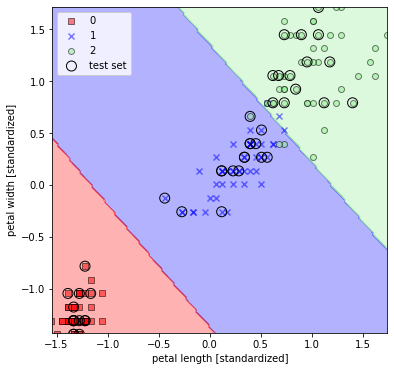


Accuracy on train set: 0.95
Accuracy on test set: 0.98


In [9]:
%matplotlib inline
from sklearn.svm import SVC
from src.plot_utils import plot_decision_regions

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, 
                      y_combined,
                      classifier=svm, 
                      test_idx=range(105, 150),
                      xlabel='petal length [standardized]',
                      ylabel='petal width [standardized]')
print('\nAccuracy on train set: %.2f' % svm.score(X_train_std, y_train))
print('Accuracy on test set: %.2f' % svm.score(X_test_std, y_test))

## Logistic regression versus support vector machines
In practical classification tasks, linear logistic regression and linear SVMs often yield very similar results. Logistic regression tries to maximize the conditional likelihoods of the training data, which makes it more prone to outliers than SVMs, which mostly care about the points that are closest to the decision boundary (support vectors). On the other hand, logistic regression has the advantage that it is a simpler model and can be implemented more easily. Furthermore, logistic regression models can be easily updated, which is attractive when working with streaming data.

## Alternative implementations in `scikit-learn`
The `scikit-learn` library's `Perceptron` and `LogisticRegression` classes make use of the [LIBLINEAR library](http://www.csie.ntu.edu.tw/~cjlin/liblinear/), which is a highly optimized C/C++ library developed at the National Taiwan University. Similarly, the `SVC` class that we used to train an SVM makes use of [LIBSVM](http://www.csie.ntu.edu.tw/~cjlin/libsvm/), which is an equivalent C/C++ library specialized for SVMs.

The advantage of using LIBLINEAR and LIBSVM over native Python implementations is that they allow the extremely quick training of large amounts of linear classifiers. However, sometimes our datasets are too large to fit into computer memory. Thus, scikit-learn also offers alternative implementations via the `SGDClassifier` class, which also supports online learning via the `partial_fit` method. The concept behind the `SGDClassifier` class is similar to the stochastic gradient algorithm that we implemented for Adaline. We could initialize the stochastic gradient descent version of the perceptron, logistic regression, and a support vector machine with default parameters as follows:

In [6]:
from sklearn.linear_model import SGDClassifier
ppn = SGDClassifier(loss='perceptron')
lr = SGDClassifier(loss='log')
svm = SGDClassifier(loss='hinge')

## Solving nonlinear problems using a kernel SVM
Another reason why SVMs enjoy high popularity among machine learning practitioners is that it can be easily **kernelized** to solve nonlinear classification problems. Before we discuss the main concept behind a **kernel SVM**, let's first create a sample dataset to see what such a nonlinear classification problem may look like.
### Kernel methods for linearly inseparable data
Using the following code, we will create a simple dataset that has the form of an XOR gate using the `logical_or` function from NumPy, where 100 samples will be assigned the class label 1, and 100 samples will be assigned the class label -1:

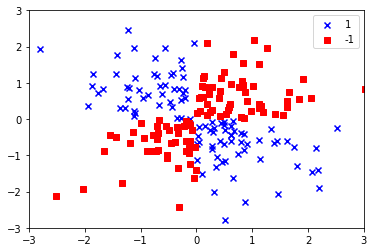

In [7]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1)

X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='b', marker='x',
            label='1')
plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c='r',
            marker='s',
            label='-1')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.show()

Obviously, we would not be able to separate samples from the positive and negative class very well using a linear hyperplane as a decision boundary via the linear logistic regression or linear SVM model that we discussed in earlier sections.

The basic idea behind kernel methods to deal with such linearly inseparable data is to create nonlinear combinations of the original features to project them onto a higher-dimensional space via a mapping function $\phi$ where it becomes linearly separable. As shown in the following figure, we can transform a two-dimensional dataset onto a new three-dimensional feature space where the classes become separable via the following projection:

$ \phi(x_1, x_2) = (z_1, z_2, z_3) = (x_1, x_2, x_1^2 + x_2^2) $

This allows us to separate the two classes shown in the plot via a linear hyperplane that becomes a nonlinear decision boundary if we project it back onto the original feature space:

![kernel](img/kernel.jpg)

### Using the kernel trick to find separating hyperplanes in high-dimensional space
To solve a nonlinear problem using an SVM, we would transform the training data onto a higher-dimensional feature space via a mapping function $\phi$ and train a linear SVM model to classify the data in this new feature space. Then, we can use the same mapping function  to transform new, unseen data to classify it using the linear SVM model.

However, one problem with this mapping approach is that the construction of the new features is computationally very expensive, especially if we are dealing with high-dimensional data. This is where the so-called kernel trick comes into play. Although we didn't go into much detail about how to solve the quadratic programming task to train an SVM, in practice all we need is to replace the dot product $\boldsymbol{x}^{(i)T}\boldsymbol{x}^{(j)}$ by $ \phi \left( \boldsymbol{x}^{(i)} \right)^T \phi \left( \boldsymbol{x}^{(j)} \right) $. In order to save the expensive step of calculating this dot product between two points explicitly, we define a so-called **kernel function**: $ \kappa \left( \boldsymbol{x}^{(i)}, \boldsymbol{x}^{(j)} \right) = \phi \left( \boldsymbol{x}^{(i)} \right)^T \phi \left( \boldsymbol{x}^{(j)} \right) $.

One of the most widely used kernels is the **Radial Basis Function (RBF)** kernel or simply called the **Gaussian kernel**:

$ \newcommand\norm[1]{\left\lVert#1\right\rVert} \large{ \kappa ( \boldsymbol{x}^{(i)}, \boldsymbol{x}^{(j)} ) = \exp \left( - \frac{ \norm{ \boldsymbol{x}^{(i)} - \boldsymbol{x}^{(j)} }^2} {2 \sigma ^2} \right) } $

This is often simplified to:

$ \newcommand\norm[1]{\left\lVert#1\right\rVert} \large{ \kappa( \boldsymbol{x}^{(i)}, \boldsymbol{x}^{(j)} ) = \exp \left( - \gamma \norm{ \boldsymbol{x}^{(i)} - \boldsymbol{x}^{(j)} } ^2 \right) } $

Here, $\large{\gamma = \frac{1} {2 \sigma^2}}$ is a free parameter that is to be optimized.

Roughly speaking, the term **kernel** can be interpreted as a **similarity function** between a pair of samples. The **minus sign inverts the distance measure into a similarity score**, and, due to the exponential term, the resulting similarity score will fall into a range between 1 (for exactly similar samples) and 0 (for very dissimilar samples).

Now that we defined the big picture behind the kernel trick, let us see if we can train a kernel SVM that is able to draw a nonlinear decision boundary that separates the XOR data well. Here, we simply use the `SVC` class from scikit-learn that we imported earlier and replace the `kernel='linear'` parameter with `kernel='rbf'`:

In [15]:
print(len(X_xor))
print(len(y_xor))
X_train, X_test, y_train, y_test = train_test_split(
    X_xor, y_xor, test_size=0.3, random_state=1)

print('Labels counts in y:', np.bincount(y_xor))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

200
200


ValueError: 'list' argument must have no negative elements


Accuracy on train set: 0.91
Accuracy on test set: 0.91


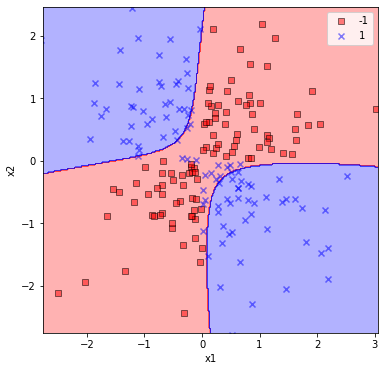

In [10]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)

svm.fit(X_train, y_train)

print('\nAccuracy on train set: %.2f' % svm.score(X_train, y_test))
print('Accuracy on test set: %.2f' % svm.score(X_train, y_test))

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined, y_combined, classifier=svm)

The  parameter, which we set to gamma=0.1, can be understood as a cut-off parameter for the Gaussian sphere. If we increase the value for , we increase the influence or reach of the training samples, which leads to a tighter and bumpier decision boundary. To get a better intuition for , let us apply an RBF kernel SVM to our Iris flower dataset:

In [16]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, 
                      y_combined, classifier=svm,
                      test_idx=range(105,150),
                      xlabel='petal length [standardized]',
                      ylabel='petal width [standardized]')

ValueError: Found input variables with inconsistent numbers of samples: [105, 140]